<a href="https://colab.research.google.com/github/sayantanraut-2407/Rdatasets/blob/master/ML_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [ ]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training_modified.csv" in Colab and View the first 5 lines

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training_modified.csv to LifeExpectancy_training_modified.csv


In [ ]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified.csv']))

In [ ]:
# Show the first 5 lines
### WRITE CODE ###
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

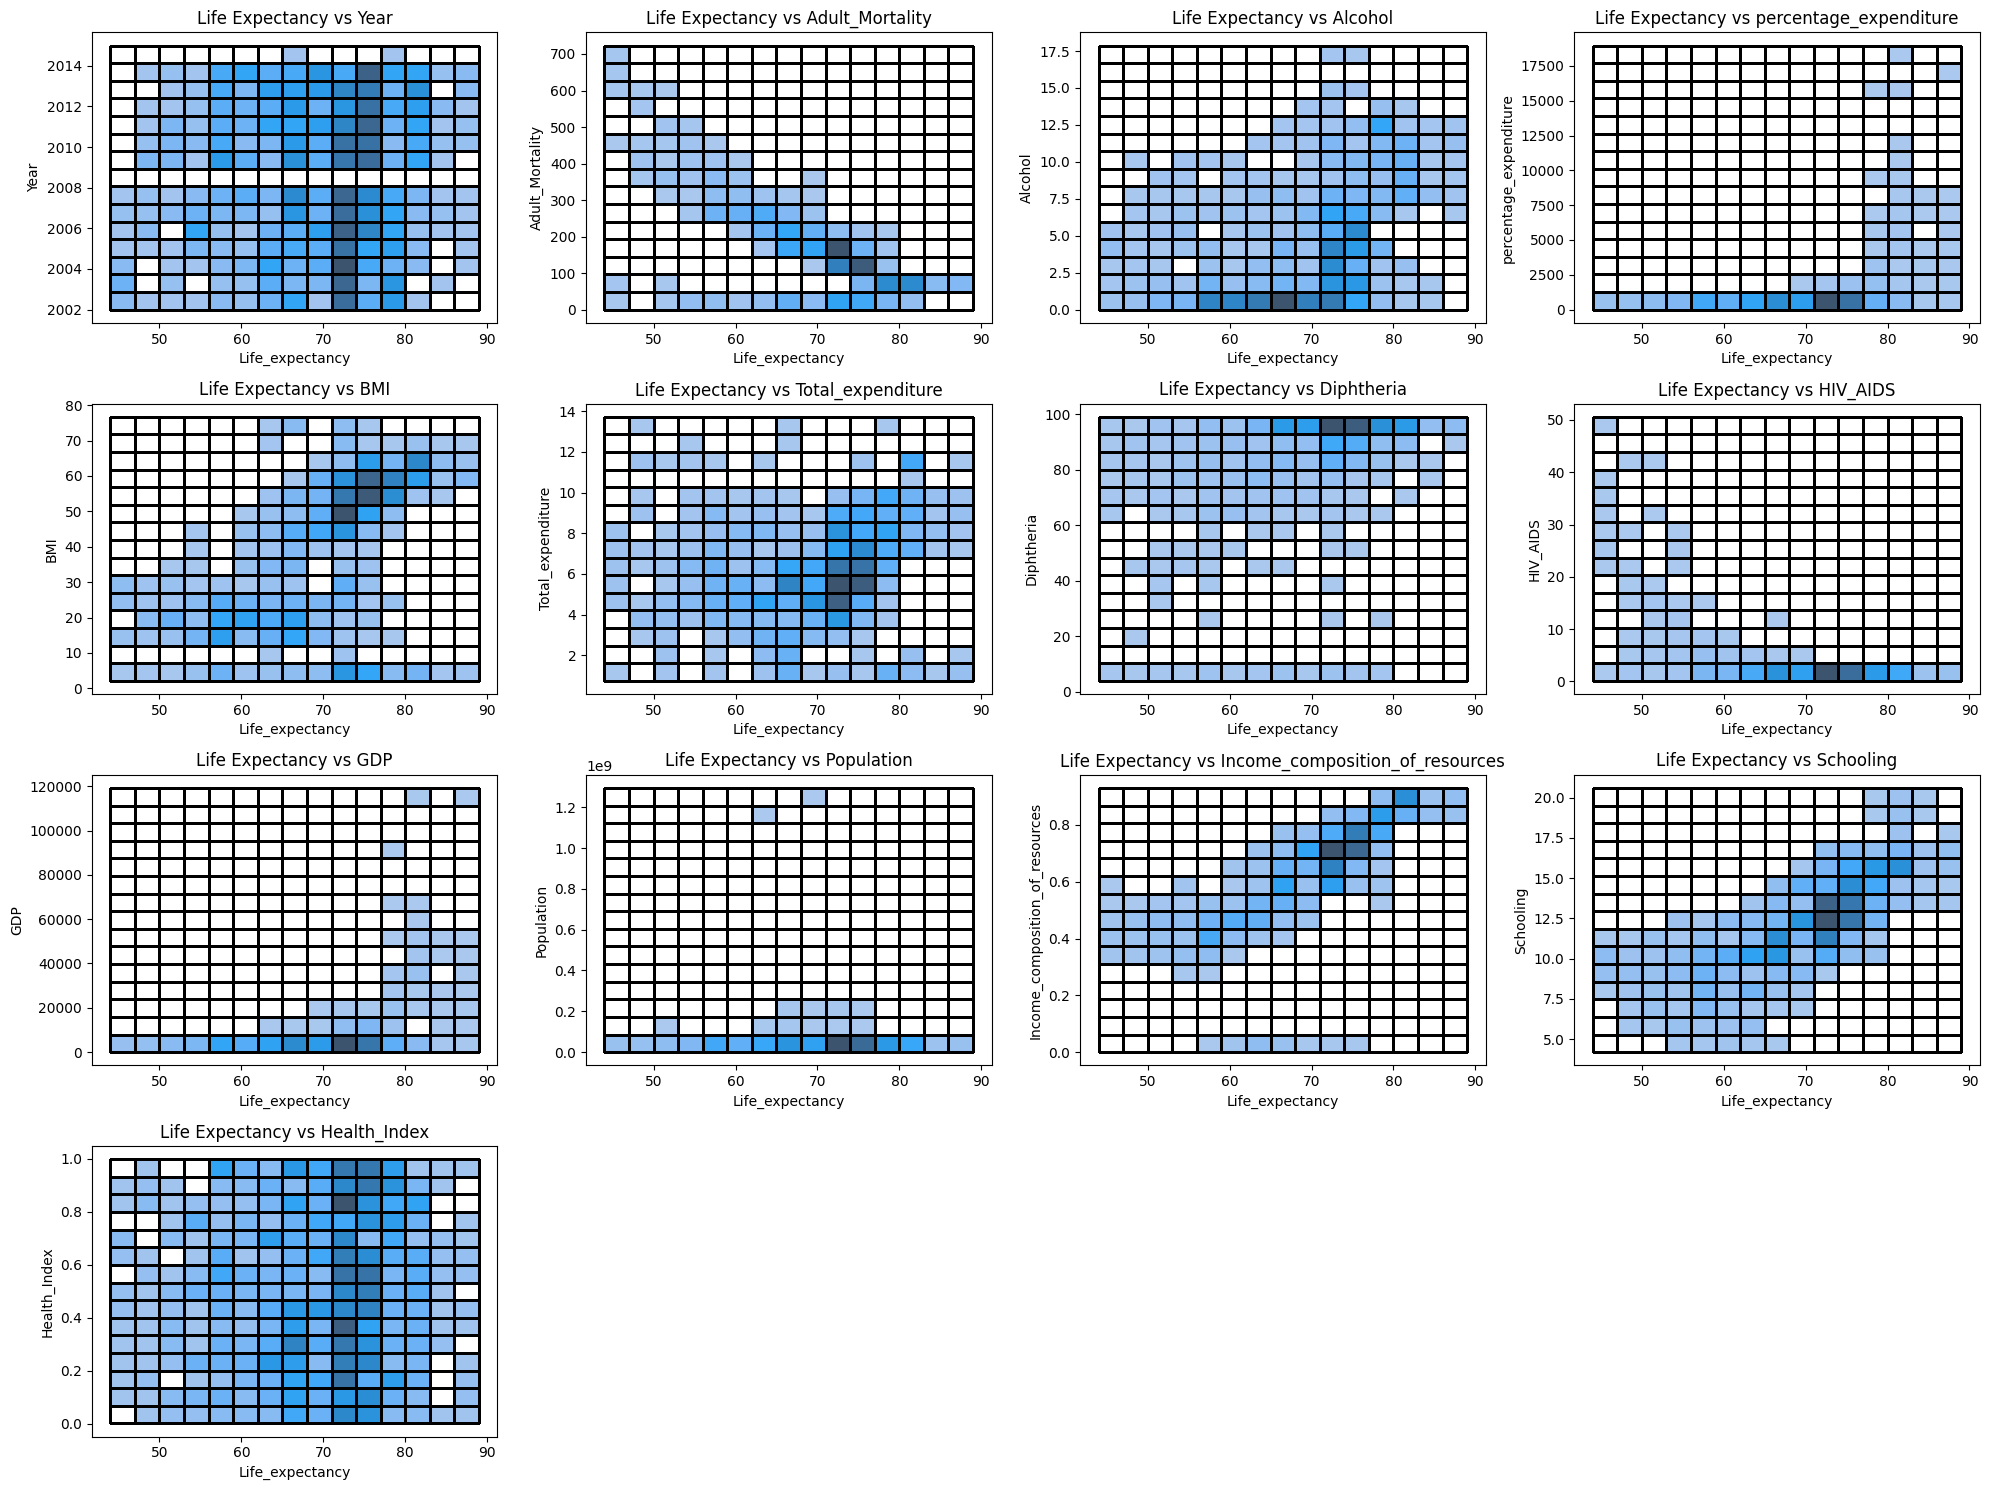

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified.csv']))

# Drop the 'Status' column
data_except_status = df.drop(columns=['Status'])

# Plot histograms for each feature against Life_expectancy
plt.figure(figsize=(20, 15))

for i, column in enumerate(data_except_status.columns.drop('Life_expectancy'), 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x='Life_expectancy', y=column, bins=15, edgecolor='black')
    plt.title(f'Life Expectancy vs {column}')

plt.tight_layout()
plt.show()


##### Q1. What can you infer from the histograms? <br/>
Ans-
By

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

<ipython-input-9-85cb8c2d66f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


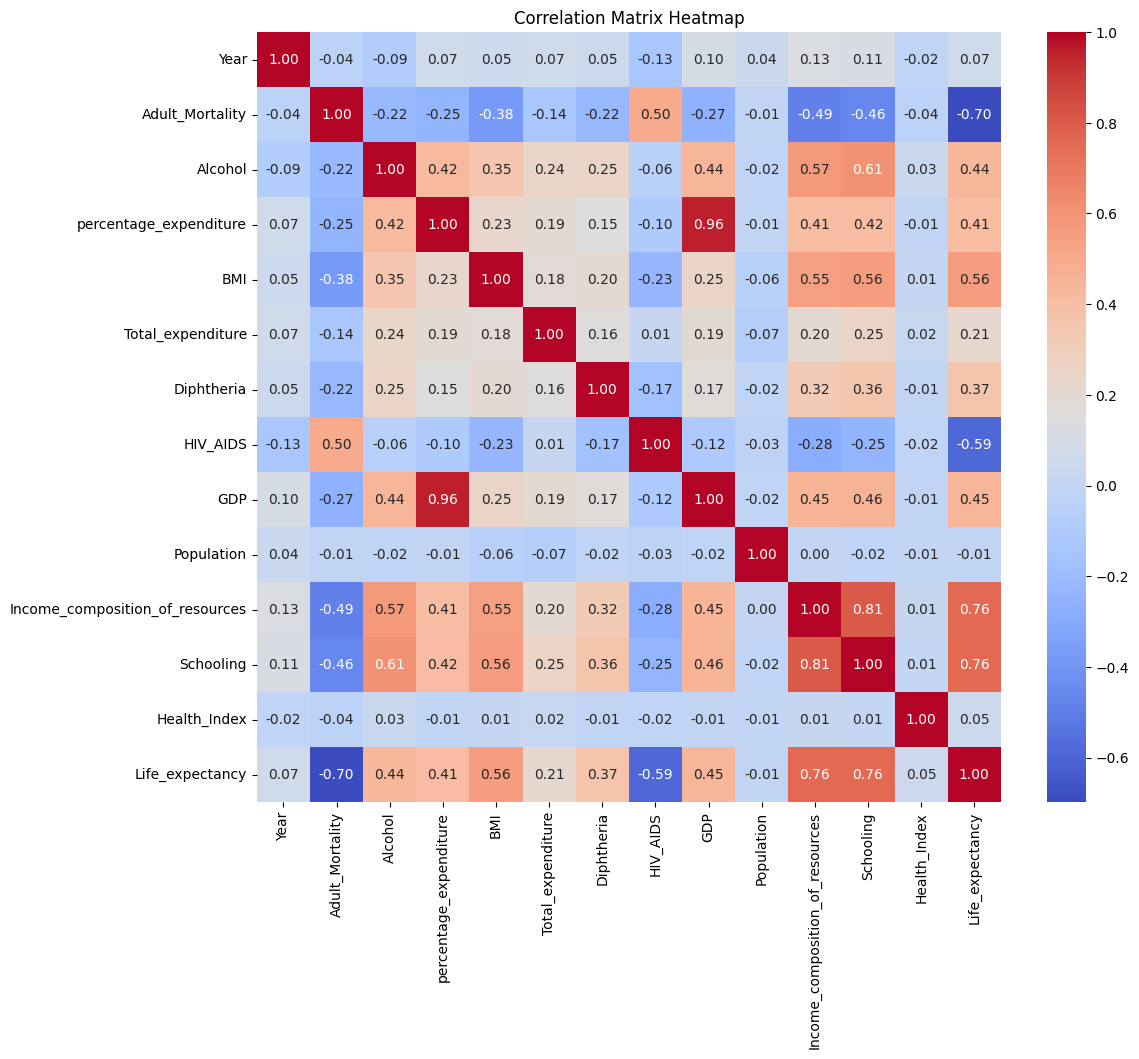

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans-
**Since the diagonal line represents the correlation between features and themselves, which will always be 1.**
##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans-
**Because every correlation between features on the right of the diagonal will be the same feature sets as the correlation on the left of the diagonal.**
##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans- **I Will choose Income_composition_of_resources as the predictor since it has the highes correlation with Life_expectancy. Also, when compare it with the schooling variable, I believe Income_composition_of_resources would better determine a person's Life_expectancy because higher income can signifincantly change the life quality and lead to a longer life.**

##### Q4.1. Is there any variable that does not make sense to you and why? <br/>
Ans- **I think population variable does not make any sense, since population is not a vriable that can change drastically and it has very little impact on Life_expectancy.**

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [ ]:
# Load the test set "LifeExpectancy_test_modified.csv"
### WRITE CODE ###


In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-  

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans-

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###


# Print the shape of your encoded X


Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

Ans-

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Bulding and fitting the Multiple Linear Regression model###


In [ ]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

Q9. Is there a problem of multicolinearity? Explain what you can do

Ans-  

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print R2 score


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print R2 score

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print R2 score

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    ### Write your code here ###


    return()

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
### Write code here ###


In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
### WRITE CODE ###





In [ ]:
# Output your prediction on test set as y_pred.


In [ ]:
#end

### Individual student contribution
Student 1 name - contribution (ex- Q 1,2,3) </br>
Student 2 name - ...